### Analysis on the Global Terrorism Database (GTD) maintained by the University of Maryland to classify and predict if attacks are perpertrated by domestic or foreign nationals using Random Forest algorithm. 

### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

### Data preparation and preprocessing

The dataset was downloaded as an excel spreadsheet from the GTD website, uploaded into Pandas and then we carry out some data wrangling and preprocessing.

In [3]:
file= r'globalterrorismdb_0617dist.xlsx'
df= pd.read_excel(file)

In [4]:
df.shape

(170350, 135)

In [5]:
#restrict this dataset to occurrences in the US.
df1= df['country_txt'].str.contains('United States')
df2= df[df1]
df2.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN


In [6]:
df2.shape

(2758, 135)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 5 to 169902
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 2.9+ MB


In [8]:
df2.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate            2721
extended                 0
resolution            2746
country                  0
country_txt              0
region                   0
region_txt               0
provstate                0
city                     0
latitude                 1
longitude                1
specificity              0
vicinity                 0
location              1852
summary               1054
crit1                    0
crit2                    0
crit3                    0
doubtterr                0
alternative           2364
alternative_txt       2364
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
                      ... 
propextent            1191
propextent_txt        1191
propvalue             1840
propcomment           1748
ishostkid              176
nhostkid              2696
n

What we have above shows we have some missing values for some variables. We will need to address later later before modeling our dataset. 

### Descriptive statistics and exploratory data analysis (EDA)

** Descriptive Statistics **

Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [9]:
df2.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.758000e+03,2758.000000,2758.000000,2758.000000,2758.000000,2758.0,2758.0,2757.000000,2757.000000,2758.000000,...,8.000000e+00,1.0,1.0,0.0,38.000000,23.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,1.983206e+11,1983.142132,6.235678,15.279913,0.004714,217.0,1.0,36.685013,-91.845078,1.020667,...,8.212500e+05,20000.0,0.0,NaN,3.131579,-2.826087,-4.360406,-4.305294,0.075780,-3.916969
std,1.335005e+09,13.347349,3.396045,9.151050,0.068506,0.0,0.0,7.375534,21.866017,0.245246,...,1.726155e+06,NaN,NaN,NaN,1.562587,43.352312,4.630165,4.690839,0.603208,4.755616
min,1.970010e+11,1970.000000,1.000000,0.000000,0.000000,217.0,1.0,17.966072,-157.858333,1.000000,...,0.000000e+00,20000.0,0.0,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971101e+11,1971.000000,3.000000,7.000000,0.000000,217.0,1.0,34.053490,-117.867834,1.000000,...,0.000000e+00,20000.0,0.0,NaN,2.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.978100e+11,1978.000000,6.000000,15.000000,0.000000,217.0,1.0,38.890370,-84.511981,1.000000,...,3.500000e+04,20000.0,0.0,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.992082e+11,1992.000000,9.000000,23.000000,0.000000,217.0,1.0,40.783060,-74.005941,1.000000,...,6.250000e+05,20000.0,0.0,NaN,4.000000,9.500000,0.000000,0.000000,0.000000,1.000000
max,2.016122e+11,2016.000000,12.000000,31.000000,1.000000,217.0,1.0,64.837778,105.270546,5.000000,...,5.000000e+06,20000.0,0.0,NaN,7.000000,92.000000,1.000000,1.000000,1.000000,1.000000


From the descriptive statistics above, one can tell the following:
1. the skewedness of each features by comparing the mean to the median (50% mark). Most of the variables, especially the dummy variables seem right skewed, but nothing really serious since variance is not overly high 
2. skewedness from #1 if any,  translate to some outliers in the distribution. This sometimes can affect results of the analysis, and may need further investigation.
3. the distribution of the datapoints. The greater the standard deviation ('std'), the more dispersed the datapoints are.

Note that the descriptive statistics above excludes the missing values and categorical variables. From the above we see that most of the variables are either slightly right or left skewed. This can also be seen in the plot of the histogram below.

One can delve deeper into each feature using the plots depending on the algorithms being used. Considering high dimensionality of the dataset, this will be very time consuming.  Since this analysis is primarily based on Random Forest (RF) and the believe that they are robust enough to cater for such deficiencies, i wouldn't spend much time on this now. All issues would be revisited if outcomes of model is not as expected.

** Initial EDA on all variables **

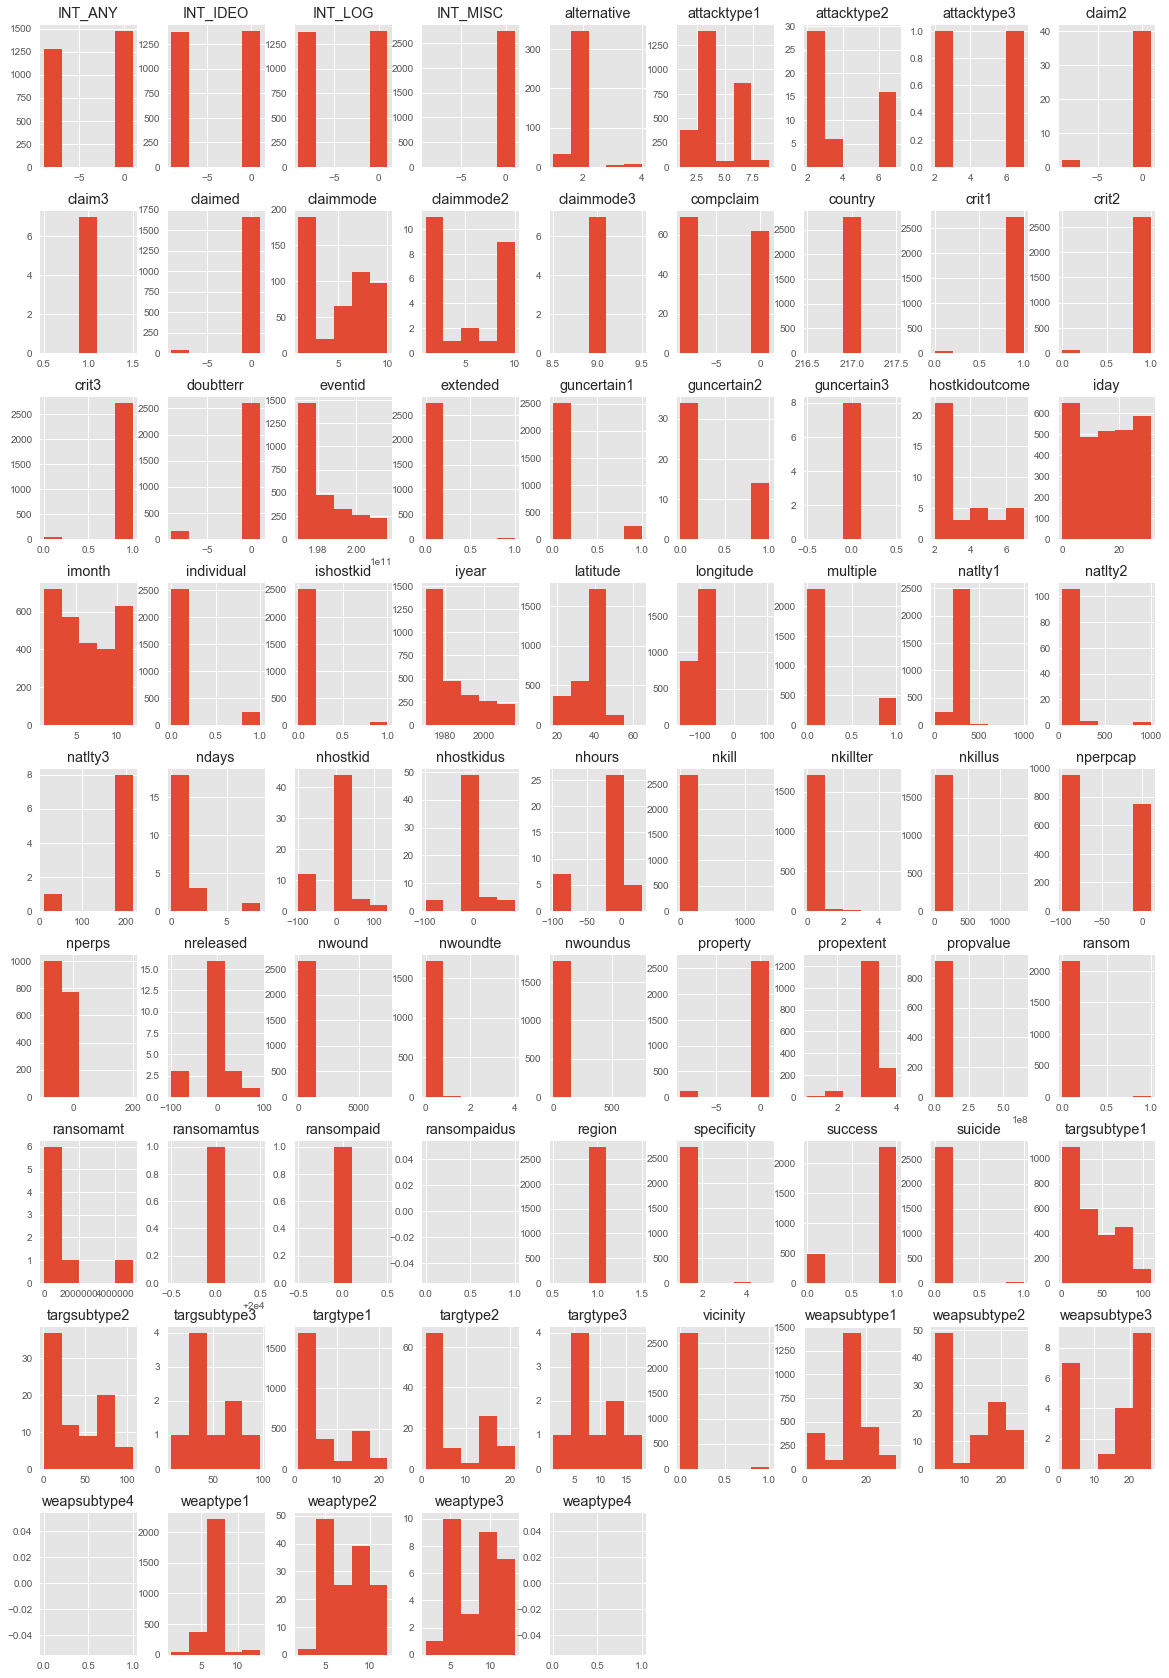

In [10]:
df2.hist(bins=5, figsize=(20,30))
plt.show()

Presence of skewness means that outliers are present in the variables affected as shown in the boxplots below. Outliers are not necessarily bad, but needs to be further investigating in relation to business objectives, required performance of the model and assumptions made about the dataset. Most times than not, this will need to be address if one is considering using a linear model to prevent negatively impacting outcomes of the model.

### Data Cleaning

Here, a class was created to help remove noisy columns that are either comments explaining what is in other columns or have more than 80% missing values.

In [11]:
class wr_ppro():
    '''Used for data wrangling and some initial preprocessing'''
    def __init__(self):
        ''''''
    def drop_col_nan(self, x, threshold):
        for col in x.columns:
            amt = sum(x[col].isnull())/float(len(x)) * 100
            if amt > threshold:
                x = x.drop(col,1)
                pd.set_option('display.max_columns', None)
        return x
        
    def drop_noisy_col(self, y, w=[]):
        y=y.drop(w, 1)
        return y
                
    def drop_col_txt(self, z):
        for c in z.columns:
            c = str(c)
            if c[-3:] =='txt':
                z = z.drop(c, 1)
                pd.set_option('display.max_columns', None)
        return z     
       

In [12]:
df3=wr_ppro().drop_col_nan(df2, 80)

In [13]:
df3.index = range(len(df2))

In [14]:
df4=wr_ppro().drop_col_txt(df3)

In [15]:
df5=wr_ppro().drop_noisy_col(df4, ['corp1', 'motive', 'target1', 'weapdetail','country','addnotes', 'summary', 'scite1' , 'scite2' , 'scite3' , 'dbsource','longitude','specificity', 'eventid', 'location','region', 'propcomment', 'latitude'])

In [16]:
df5.shape

(2758, 41)

In [17]:
df5.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
provstate          0
city               0
vicinity           0
crit1              0
crit2              0
crit3              0
doubtterr          0
multiple           0
success            0
suicide            0
attacktype1        0
targtype1          0
targsubtype1     120
natlty1            9
gname              0
guncertain1        0
individual         0
nperps           982
nperpcap        1055
claimed         1051
weaptype1          0
weapsubtype1     259
nkill             73
nkillus          953
nkillter        1004
nwound            93
nwoundus         973
nwoundte        1018
property           0
propextent      1191
propvalue       1840
ishostkid        176
ransom           588
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [18]:
df5.dtypes

iyear             int64
imonth            int64
iday              int64
extended          int64
provstate        object
city             object
vicinity          int64
crit1             int64
crit2             int64
crit3             int64
doubtterr         int64
multiple          int64
success           int64
suicide           int64
attacktype1       int64
targtype1         int64
targsubtype1    float64
natlty1         float64
gname            object
guncertain1     float64
individual        int64
nperps          float64
nperpcap        float64
claimed         float64
weaptype1         int64
weapsubtype1    float64
nkill           float64
nkillus         float64
nkillter        float64
nwound          float64
nwoundus        float64
nwoundte        float64
property          int64
propextent      float64
propvalue       float64
ishostkid       float64
ransom          float64
INT_LOG           int64
INT_IDEO          int64
INT_MISC          int64
INT_ANY           int64
dtype: object

** Checking for outliers **

In [19]:
#df6.columns
df5.columns


Index(['iyear', 'imonth', 'iday', 'extended', 'provstate', 'city', 'vicinity',
       'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success',
       'suicide', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'propextent', 'propvalue',
       'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

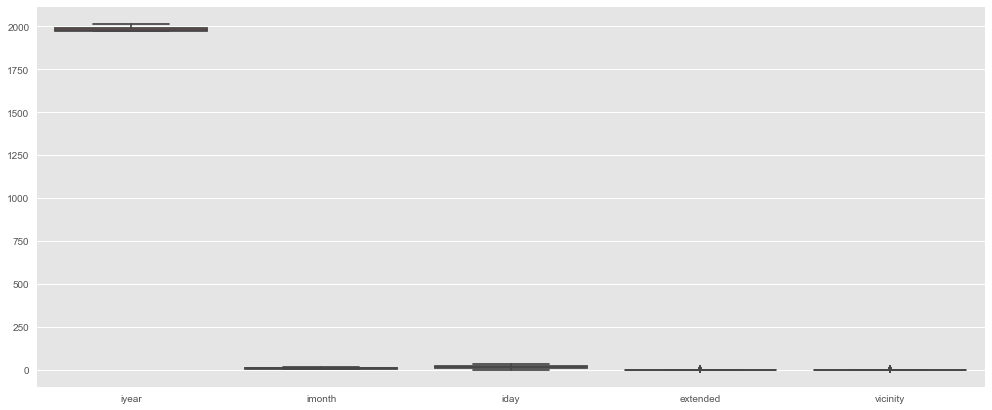

In [20]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['iyear', 'imonth', 'iday', 'extended', 'provstate', 'city', 'vicinity']])

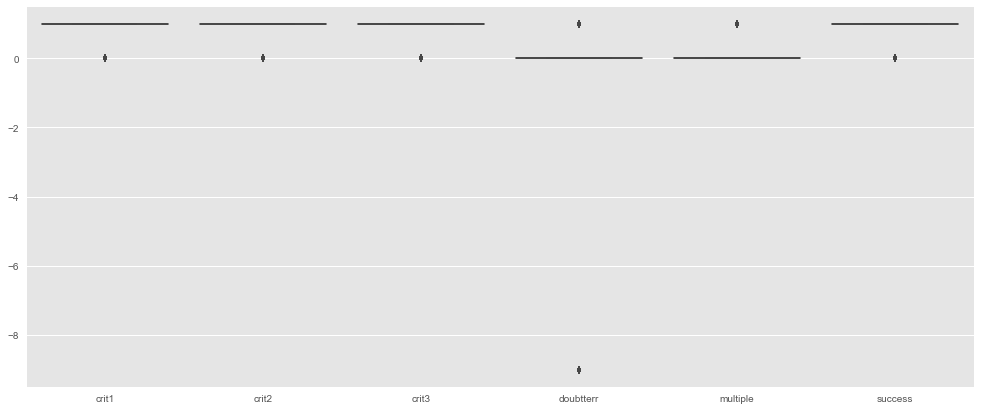

In [21]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success']])

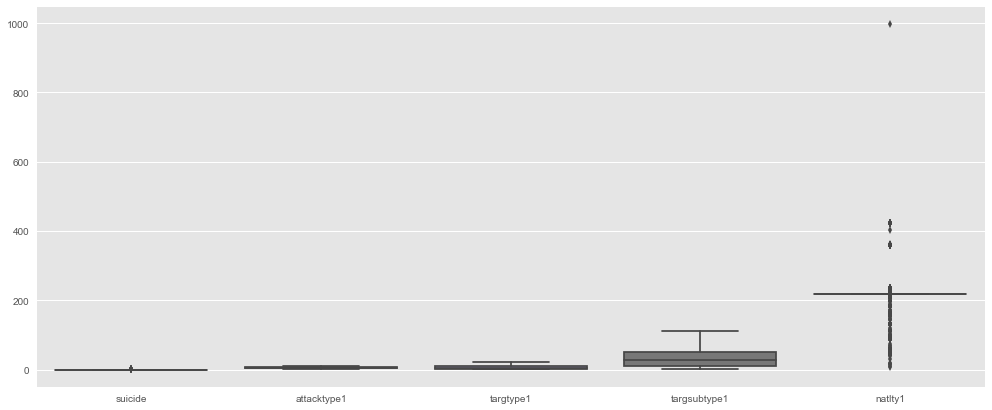

In [22]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['suicide', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1']])

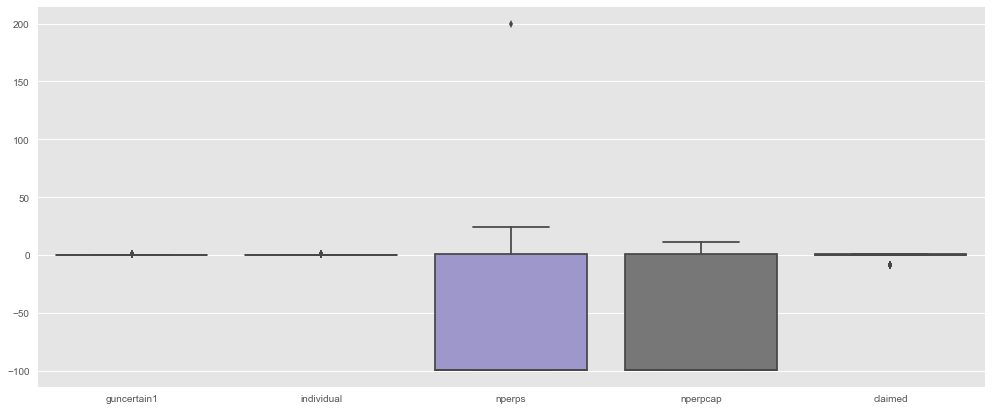

In [23]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed']])

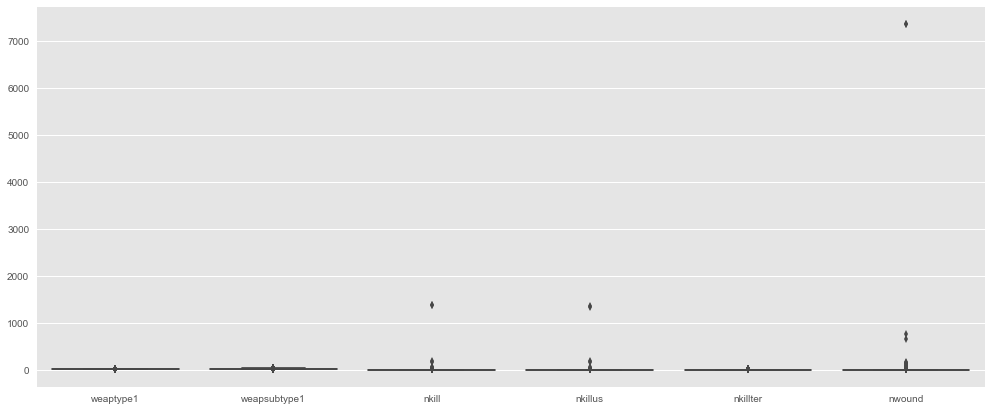

In [24]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['weaptype1', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound']])

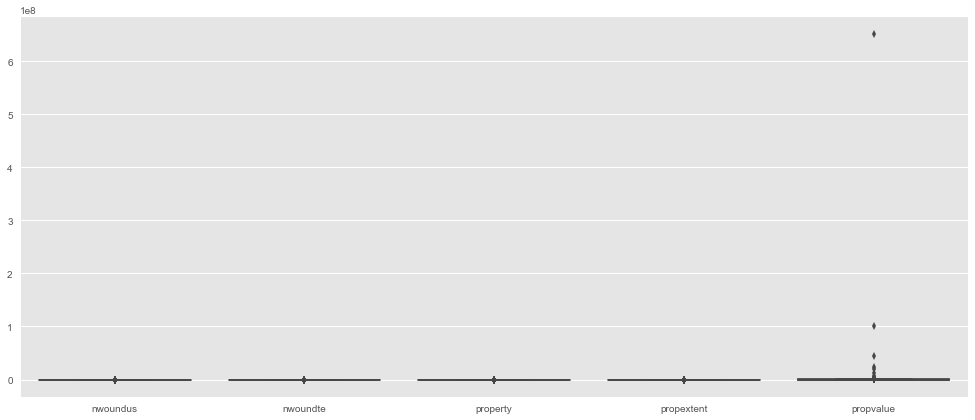

In [25]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['nwoundus', 'nwoundte', 'property', 'propextent', 'propvalue']])

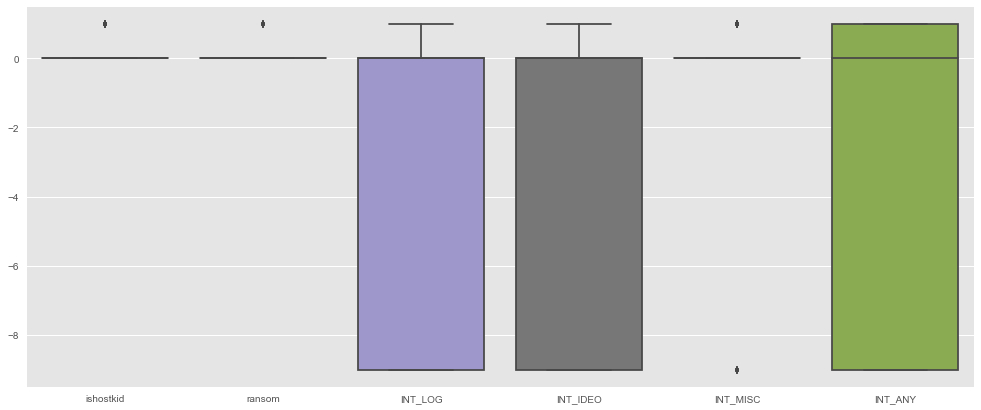

In [26]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']])

The dataset contains outliers, most notable "propvalue", "natlty1", "natlty1", "nperps", "nkill", "nkillus"and "nwound." Please refer to Codebook for meaning of the variables. And this causes skweness in the distribution of variables as seen in some of the plots above. These could have been an issue if we are considering linear models like Linear or Logistic Regression models. One would need to examine these issues closely and correct for such before building the model. Outliers are not necessarily bad. It depends on business needs and how much accuracy one is trying to achieve  Since I am considering non-linear models like the Random Forest, these issues are usually implicitly addressed. That is a big advantage of using such models. I decided to leave them in there to see how the model perform with an option of revisiting them if the outcome is not favorable. 

** Analyzing the Categorical Variables **

What i am looking for here is checking if the feature can be readily used in machine learning algorithms or needs much rework. By that, i mean having either even or closely uniform class sizes in the feature to allow an equal representation chance of each class in the train and test dataset. I am also looking at the cardinality of the feature and a possibility of any of the classes dominating the analysis (overfitting).

In [27]:
#this shows high cardinality in the dataset with uneven classes, and is usually an issue when building machine learning models.
#re-engineering of the feature is needed, else you are looking at cases of the model overfitting the dominant classes or having 
#somes examples in the train set missing in the test set depending on the size of the chosen sample after running the 
#train-test-split. the latter case also causes uneven features in the train set compared to the validation test after 
#categorical features are hotcoded, hence causing issues with for machine learning algorithms. So, i am dropping this for now 
#till the feature is re-engineered with probably some domain knowledge

df5['provstate'].value_counts()

California              586
New York                504
Puerto Rico             247
Florida                 153
Illinois                110
Washington               98
District of Columbia     83
Oregon                   65
Texas                    59
Massachusetts            57
Ohio                     51
New Jersey               47
Colorado                 44
Michigan                 44
Virginia                 39
Wisconsin                37
Missouri                 36
Maryland                 34
Arizona                  34
North Carolina           31
Pennsylvania             31
Georgia                  29
New Mexico               24
Minnesota                24
Iowa                     23
Nebraska                 23
Tennessee                22
Indiana                  21
Utah                     20
Louisiana                18
Connecticut              17
Nevada                   16
Alabama                  15
Oklahoma                 15
Idaho                    14
Kansas              

In [28]:
# with 705 classes, this is worse than what we had in the 'provstate' feature. Since city is already implied in state, and one 
#may not have large variance amongst cities in a state, I will drop the 'city' variable and see how our model performs.  
df5['city'].value_counts()

New York City       449
San Juan            115
Los Angeles         109
San Francisco        98
Miami                85
Washington           84
Chicago              56
Seattle              39
Berkeley             33
San Diego            22
Denver               22
Portland             21
Oakland              20
Boston               18
San Jose             18
Houston              17
Rio Piedras          17
Kansas City          17
Albuquerque          16
Sacramento           16
Unknown              15
Detroit              15
Phoenix              14
Cairo                12
Atlanta              12
Eugene               12
Arlington            12
Carolina             12
Fresno               11
Palo Alto            11
                   ... 
Los Altos Hills       1
Littleton             1
Escanaba              1
Reisterstown          1
Tupelo                1
Lockland              1
Milpitas              1
Buffalo               1
Fort Smith            1
Seven Corners         1
Cherry Hill     

In [29]:
df5.gname.value_counts()

Unknown                                                 552
Anti-Abortion extremists                                198
Left-Wing Militants                                     169
Fuerzas Armadas de Liberacion Nacional (FALN)           120
New World Liberation Front (NWLF)                        86
Black Nationalists                                       82
White extremists                                         79
Animal Liberation Front (ALF)                            75
Jewish Defense League (JDL)                              74
Student Radicals                                         71
Earth Liberation Front (ELF)                             66
Omega-7                                                  54
Weather Underground, Weathermen                          45
Macheteros                                               37
Black Liberation Army                                    36
Anti-Government extremists                               33
Chicano Liberation Front                

### Feature Engineering

Here, i tried to address high cardinality issues for the 'provstate'. Taking a look at the 'provstate' and the 'city' feature we see of the 'Recipient_State' feature by re-engineering it into a regions. The new feature was called 'state_region,' and the original state feature dropped afterward

In [30]:
#created a dictionary of key-value pair mapping the regions to all the states
region = {'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 
                        'New York', 'Pennsylvania'],
          'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Missouri', 
                    'Nebraska', 'North Dakota', 'South Dakota'],
          'South': ['Louisiana', 'Oklahoma', 'Texas', 'Delaware', 'District of Columbia', 'Maryland', 'Virginia', 
                    'West Virginia', 'Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 
                    'South Carolina', 'Tennessee'],
          'West':  ['Arkansas', 'Idaho', 'Oregon', 'Washington', 'Colorado', 'Montana', 'Utah', 'Wyoming', 'New Mexico',
                    'Arizona', 'California', 'Hawaii', 'Nevada', 'Alaska', 'Arizona', ],
          'Others': ['Puerto Rico', 'Unknown',]}

In [31]:
#for loop that did the job of the mapping
new = []
for state in df5.copy()['provstate']:
    for k, y in region.items():
        if state in y:
            new.append(k)

In [32]:
#creation of the new feature
df5['state_region'] = new

In [33]:
#dropping the old feature
df6=df5.drop(['provstate',], axis=1)

In [34]:
df6.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,-9,0,-9,Midwest
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,0,0,0,0,Midwest
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest


In [35]:
df6.shape

(2758, 41)

In [36]:
df6['state_region'].value_counts()

West         919
Northeast    677
South        518
Midwest      396
Others       248
Name: state_region, dtype: int64

*** Using clustering to try regrouping 'gname' into fewer groups ***

In [37]:
from kmodes.kprototypes import KPrototypes
from matplotlib import style
#style.use("ggplot")
#colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [38]:
df6.new= df6.copy().replace(-99, -9)
#df6.new2 = df6.new.replace(-99, -9).reset_index()

C:\Users\dejavu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [39]:
df6.new.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-9.0,-9.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,-9,0,-9,Midwest
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-9.0,-9.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,0,0,0,0,Midwest
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest


In [40]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [41]:
df6_new2 = DataFrameImputer().fit_transform(df6.new)
df6_new2.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-9.0,-9.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,-9,-9,0,-9,Midwest
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-9.0,-9.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,0,0,0,0,Midwest
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,-9.0,-9.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest


In [42]:
gname_list= df6.copy()['gname'].values.tolist()
others_list = df6_new2.drop('gname', axis=1).values.tolist()
#others_list = df6_new2.values.tolist()

In [43]:
gname_array = np.array(gname_list)
others_array = np.array(others_list)

In [44]:
gname_array

array(['Black Nationalists', 'Unknown', "New Year's Gang", ..., 'Unknown',
       'Unknown', 'Anti-Semitic extremists'], dtype='<U72')

In [45]:
others_array[0]

array(['1970', '1', '1', '0', 'Cairo', '0', '1', '1', '1', '0', '0', '1',
       '0', '2', '3', '22.0', '217.0', '0.0', '0', '-9.0', '-9.0', '0.0',
       '5', '5.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1', '3.0',
       '5000.0', '0.0', '0.0', '-9', '-9', '0', '-9', 'Midwest'],
      dtype='<U21')

In [47]:
kproto = KPrototypes(n_clusters=6, init='Cao', n_init=5, verbose=1) #init='Huang'
clusters = kproto.fit_predict(others_array, categorical=[4,5, 6, 7, 8, 9, 10, 11, 12,
                                                         13,14,15,16,17,18,19,20,23,24,25,30,31,33,
                                                         34,35,36,37,38,39])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

In [48]:
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

[array([[1.99400000e+03, 6.33333333e+00, 1.06666667e+01, 0.00000000e+00,
        6.66666667e-01, 7.33333333e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.96666667e+07],
       [1.99500000e+03, 4.00000000e+00, 1.90000000e+01, 0.00000000e+00,
        0.00000000e+00, 6.00000000e+00, 0.00000000e+00, 6.50000000e+02,
        6.50000000e+02, 0.00000000e+00, 6.52000000e+08],
       [1.99096154e+03, 6.26923077e+00, 1.70769231e+01, 3.84615385e-02,
        3.84615385e-01, 7.46153846e+00, 0.00000000e+00, 3.84615385e-01,
        2.30769231e-01, 0.00000000e+00, 2.12101746e+06],
       [1.98301102e+03, 6.23026074e+00, 1.52673522e+01, 4.40690415e-03,
        2.97466030e-02, 6.59823724e+00, 2.27690048e-02, 6.40286449e+00,
        7.12449504e-01, 1.21189864e-02, 2.52636148e+04],
       [2.00275000e+03, 8.75000000e+00, 1.67500000e+01, 0.00000000e+00,
        2.50000000e-01, 8.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.50000000e

In [49]:
for s, c in zip(gname_array, clusters):
    print("Result: {}, cluster:{}".format(s, c))

Result: Black Nationalists, cluster:3
Result: Unknown, cluster:3
Result: New Year's Gang, cluster:3
Result: New Year's Gang, cluster:3
Result: Weather Underground, Weathermen, cluster:3
Result: Left-Wing Militants, cluster:3
Result: Left-Wing Militants, cluster:3
Result: Armed Commandos of Liberation, cluster:2
Result: Black Nationalists, cluster:3
Result: Strikers, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Student Radicals, cluster:3
Result: White extremists, cluster:3
Result: Strikers, cluster:3
Result: White extremists, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Left-Wing Militants, cluster:3
Result: White extremists, cluster:3
Result: Strikers, cluster:3
Result: Strikers, cluster:3
Result: Student Radicals, cluster:3
Result: Unknown, cluster:3
Result: Left-Wing Militants, cluster:3
Result: Black Nationalis

Result: Jewish Defense League (JDL), cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: United Freedom Front (UFF), cluster:3
Result: Black Liberation Army, cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: Black Liberation Army, cluster:3
Result: May 19 Communist Order, cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: May 19 Communist Order, cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: United Freedom Front (UFF), cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: Vietnamese Organization to Exterminate Communists and Restore the Nation, cluster:3
Result: United Freedom Front (UFF), cluster:3
Result: Jamaat-al-Fuqra, cluster:3
Result: Jamaat-al-Fuqra, cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: Unknown, cluster:3
Result: Army of God, cluster:3
Res

In [50]:
result = zip(gname_array, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)              

[('Macheteros', 0), ('Earth Liberation Front (ELF)', 0), ('Earth Liberation Front (ELF)', 0), ('Anti-Government extremists', 1), ('Armed Commandos of Liberation', 2), ('Student Radicals', 2), ('Black Nationalists', 2), ('Black Nationalists', 2), ("New Year's Gang", 2), ('Weather Underground, Weathermen', 2), ('Unknown', 2), ('Omega-7', 2), ('The Order (Silent Brotherhood)', 2), ('Anti-Abortion extremists', 2), ('Mormon Extremist', 2), ('Animal Liberation Front (ALF)', 2), ('Anti-Government Group', 2), ('Animal Liberation Front (ALF)', 2), ('Animal Liberation Front (ALF)', 2), ('Anti-Environmentalists', 2), ('Animal Liberation Front (ALF)', 2), ('Animal Liberation Front (ALF)', 2), ('Earth Liberation Front (ELF)', 2), ('Earth Liberation Front (ELF)', 2), ('Animal Liberation Front (ALF)', 2), ('Earth Liberation Front (ELF)', 2), ('Coalition to Save the Preserves (CSP)', 2), ('Earth Liberation Front (ELF)', 2), ('Unknown', 2), ('Unknown', 2), ('Black Nationalists', 3), ('Unknown', 3), ("N

In [51]:
sub_df = pd.DataFrame(sortedR, columns=['reworked_gname', 'new_gname'])

In [52]:
sub_df.head()

,reworked_gname,new_gname
0,Macheteros,0
1,Earth Liberation Front (ELF),0
2,Earth Liberation Front (ELF),0
3,Anti-Government extremists,1
4,Armed Commandos of Liberation,2


In [53]:
sub_df['new_gname'].value_counts()

3    2723
2      26
4       4
0       3
5       1
1       1
Name: new_gname, dtype: int64

Looking at the above, we see that k-prototype clustering may not work at this time because the classes shown above are still very imbalanced and fall the risk of introducing bias. We probably need more data or further domain knowledge to help regroup this feature to fewer classes. Till then, I am leaving this feature out of our analysis.

In [54]:
df6['new_gname'] = sub_df['new_gname']

In [55]:
df6.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region,new_gname
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,-9,0,-9,Midwest,0
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West,0
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest,0
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,0,0,0,0,Midwest,1
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest,2


### Creating a Test Set

Since we already have a target variable, it is now advisable to create an out of sample test set data. It may sound strange to do that now, but this usually prevent what is called a data snooping bias. This is because the human brain is known to be an amazing pattern detection system, which means that it is highly prone to overfitting. So, we set the test set data aside that we will not touch at all, and continue with the training set data.

In [56]:
#here we are saying that we want the test data to be 20% of the full dataset, and the random_state is just setting a 
#random number generator's seed before creating the test set so that it always generates the same shuffled indices.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df6, test_size=0.20, random_state=42)

In [57]:
train_set.shape, test_set.shape

((2206, 42), (552, 42))

In [58]:
#we create a copy of the train data we will work with
df6_copy = train_set.copy()

### Inferential statistics on the training set data

One way to infer relationships in a dataset is using the Pearson's r - correlation. This provides both a descriptive and inferential statistics. It describes the relationship between two paired variables in a given sample; it also provides a very
good estimate for this relationship in the population from which the paired sample was taken. The correlation coefficient of all features with the target variables is as shown below.

In [59]:
#checking correlation of all features with the target variable - 'active_user'
corr_matrix = df6_copy.corr()
corr_matrix['INT_IDEO'].sort_values(ascending=False)

INT_IDEO        1.000000
INT_LOG         0.995097
INT_ANY         0.926308
doubtterr       0.162708
guncertain1     0.130487
INT_MISC        0.124093
nperps          0.099519
imonth          0.093175
ishostkid       0.089270
crit1           0.082524
iday            0.080582
property        0.064731
new_gname       0.057471
propextent      0.050864
nkillus         0.050421
nwound          0.035175
nkill           0.034335
success         0.030219
nperpcap        0.028525
ransom          0.028081
nwoundte        0.020506
vicinity        0.013300
suicide         0.012432
nwoundus        0.011933
extended        0.011790
multiple        0.011188
nkillter        0.008645
claimed        -0.011660
natlty1        -0.024602
propvalue      -0.028043
weaptype1      -0.031902
crit3          -0.033850
weapsubtype1   -0.075121
crit2          -0.128664
attacktype1    -0.137612
iyear          -0.153564
targtype1      -0.154844
targsubtype1   -0.192335
individual     -0.293402
Name: INT_IDEO, dtype: fl

We see that most predictors under consideration either have a weak positive or negative linear correlation with active user, except one. The closer the correlation values are to zero, the certainty it is that there is no linear correlation. When the values are closer to either 1 or -1, we have a strong positive linear correlation or strong negative linear correlation respectively. Further transformation of each variables, combining variables or use of a non-linear models may be needed. We can revisit this if model outcome is questionable for further tweaking.

*** A further look into the inferential statistics of this dataset can be found at https://github.com/andyogah/data_science_capstone_project_1/blob/master/data_science_capstone_project_1%20(2)%20inferential_statistics.ipynb***

### Additional EDA to gain more insights into attack occurrences on the training set data

Since the label or target variable is categorical, it wouldn't make sense to use a scatterplot to visualize relationship of such with other predictor variables. Scatterplot are better choice for visualizing association between continuous variables. Bar plots and/or boxplots are better choice for categorical variables. Both were used in the EDA below in this section.

*** Removing the unknowns from group name (gname) column ***

In [60]:
#df6 = df5_copy[df5_copy['gname'] != 'Unknown']
#df6.shape

In [61]:
# this will be useful in future analysis as an out of sample dataset 
#df7 = df5_copy[df5_copy['gname'] == 'Unknown']
#df7.shape

*** Reseting the Index ***


In [62]:
df6_copy.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region,new_gname
2649,2014,11,4,0,Roswell,0,1,1,1,0,0,0,0,3,14,79.0,217.0,Unknown,0.0,1,1.0,1.0,1.0,6,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,-9,-9,0,-9,South,3
261,1970,5,30,0,New York City,0,1,1,1,0,0,1,0,3,1,12.0,217.0,Left-Wing Militants,0.0,0,-99.0,-99.0,0.0,6,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,3000.0,0.0,0.0,-9,-9,0,-9,Northeast,3
1610,1981,12,24,0,New York City,0,1,1,1,0,0,0,0,3,7,47.0,359.0,Jewish Defense League (JDL),0.0,0,NaN,NaN,NaN,6,14.0,0.0,0.0,NaN,0.0,0.0,NaN,1,NaN,NaN,0.0,0.0,0,1,1,1,Northeast,3
1407,1979,2,27,0,Eastchester,0,1,1,1,0,0,1,0,3,1,4.0,217.0,United Freedom Front (UFF),0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,NaN,0.0,0.0,0,0,0,0,Northeast,3
1789,1984,12,10,0,Cayey,0,1,1,1,0,1,0,0,3,4,28.0,217.0,Organization of Volunteers for the Puerto Rica...,0.0,0,-99.0,-99.0,0.0,6,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,-99.0,0.0,NaN,0,0,0,0,Others,3


In [63]:
#df8 = df6.reset_index(drop=True)
df7 = df6_copy.reset_index(drop=True)
df7.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region,new_gname
0,2014,11,4,0,Roswell,0,1,1,1,0,0,0,0,3,14,79.0,217.0,Unknown,0.0,1,1.0,1.0,1.0,6,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,-9,-9,0,-9,South,3
1,1970,5,30,0,New York City,0,1,1,1,0,0,1,0,3,1,12.0,217.0,Left-Wing Militants,0.0,0,-99.0,-99.0,0.0,6,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,3000.0,0.0,0.0,-9,-9,0,-9,Northeast,3
2,1981,12,24,0,New York City,0,1,1,1,0,0,0,0,3,7,47.0,359.0,Jewish Defense League (JDL),0.0,0,NaN,NaN,NaN,6,14.0,0.0,0.0,NaN,0.0,0.0,NaN,1,NaN,NaN,0.0,0.0,0,1,1,1,Northeast,3
3,1979,2,27,0,Eastchester,0,1,1,1,0,0,1,0,3,1,4.0,217.0,United Freedom Front (UFF),0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,NaN,0.0,0.0,0,0,0,0,Northeast,3
4,1984,12,10,0,Cayey,0,1,1,1,0,1,0,0,3,4,28.0,217.0,Organization of Volunteers for the Puerto Rica...,0.0,0,-99.0,-99.0,0.0,6,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,-99.0,0.0,NaN,0,0,0,0,Others,3


In [64]:
df7.shape

(2206, 42)

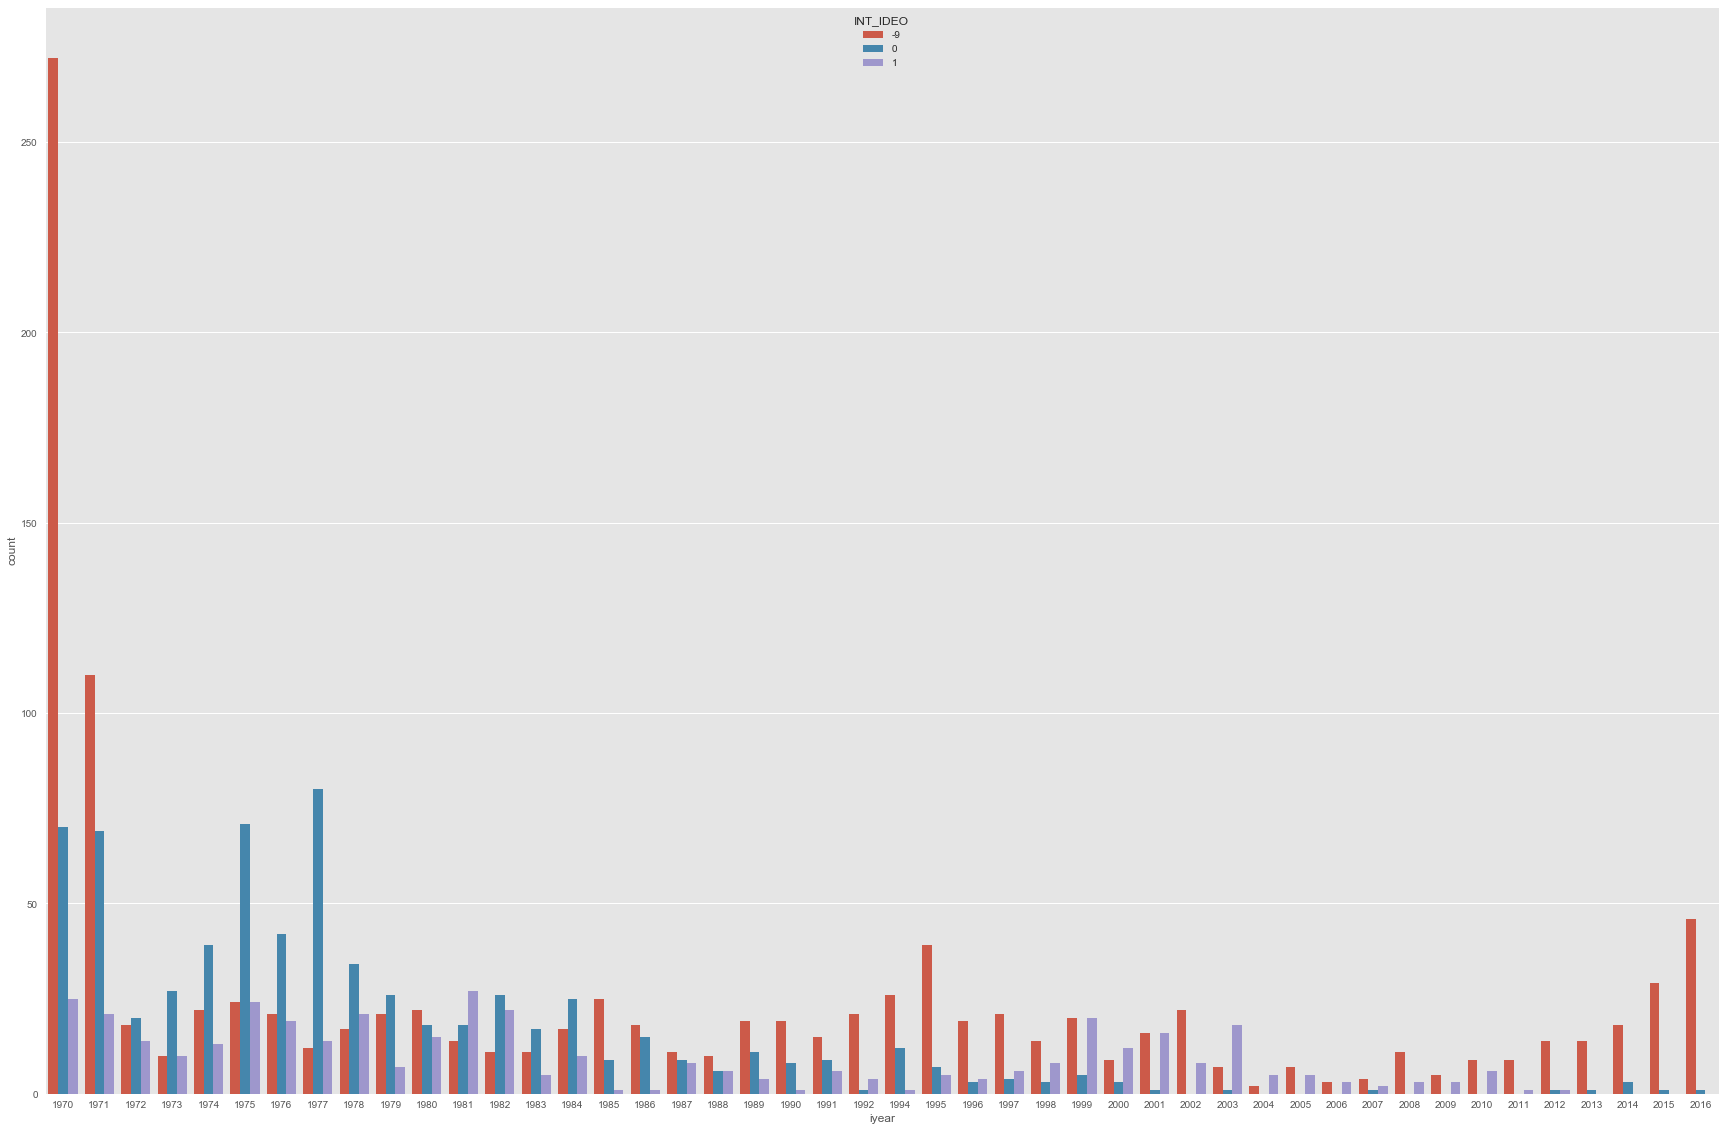

In [65]:
# i chose to do vi
fig = plt.figure(figsize=(30, 20))
fig.add_subplot(1,1,1)
sns.countplot(x="iyear", hue="INT_IDEO", data=df7)
plt.show()

The 2-dimensional chart above shows the overall trend of attacks in the US, with zero (0) representing americans and a one(1) being a foreign citizen. This plot shows overall attack trend were much higher 30 to 40 years compared to what we have now, probably because of social awareness and technological advancement in curbing such occurrences. The unknown class in this variable will probably cause a lot of uncertainities because according to data owners at the Uniuversity of Maryland, these are people whose citizenship could not identified. This could tilt analysis and judgement in either ways of each of the other classes, if indeed they were identified. 


A good and probably the best way to represent a categorical variable is the bar or pie chart because we are looking at the comparison between proportions. So, I will be using both in this analysis.

The first question we need to ask of the data is, since 1970 - when the collection of terrorism data started, till date, which is more than a period of over forty-five years, can we say the proportion of known attacks perpetrated by foreigners is same as those of citizens of the US?

In [66]:
df7['INT_IDEO'].value_counts()

-9    1104
 0     697
 1     405
Name: INT_IDEO, dtype: int64

In [67]:
df8 = df7[(df7['INT_LOG'] != -9) & (df7['INT_MISC'] !=-9) & (df7['INT_ANY'] != -9) & (df7['INT_IDEO'] != -9)]
df9= df8.reset_index(drop=True)
df9.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region,new_gname
0,1981,12,24,0,New York City,0,1,1,1,0,0,0,0,3,7,47.0,359.0,Jewish Defense League (JDL),0.0,0,NaN,NaN,NaN,6,14.0,0.0,0.0,NaN,0.0,0.0,NaN,1,NaN,NaN,0.0,0.0,0,1,1,1,Northeast,3
1,1979,2,27,0,Eastchester,0,1,1,1,0,0,1,0,3,1,4.0,217.0,United Freedom Front (UFF),0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,NaN,0.0,0.0,0,0,0,0,Northeast,3
2,1984,12,10,0,Cayey,0,1,1,1,0,1,0,0,3,4,28.0,217.0,Organization of Volunteers for the Puerto Rica...,0.0,0,-99.0,-99.0,0.0,6,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,-99.0,0.0,NaN,0,0,0,0,Others,3
3,1970,4,23,0,Aguada,0,1,1,1,0,1,0,0,3,3,22.0,163.0,Armed Commandos of Liberation,0.0,0,-99.0,-99.0,1.0,6,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0,0,0,Others,3
4,1987,11,25,0,Santa Clara,0,1,1,1,0,0,1,0,7,1,5.0,217.0,Animal Liberation Front (ALF),0.0,0,-99.0,-99.0,1.0,8,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,-99.0,0.0,0.0,0,1,0,1,West,3


In [68]:
df9.shape

(1102, 42)

In [69]:
df10 = df9[["iyear", "INT_IDEO"]]
df10.head()

,iyear,INT_IDEO
0,1981,1
1,1979,0
2,1984,0
3,1970,0
4,1987,1


In [70]:
citizenship = []
for x in df10['INT_IDEO']:
    if x == 0:
        x = 'american'
    else: 
        x = 'foreigner'
    citizenship.append(x)

In [71]:
df10['citizenship'] = citizenship

C:\Users\dejavu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
df10.head()

,iyear,INT_IDEO,citizenship
0,1981,1,foreigner
1,1979,0,american
2,1984,0,american
3,1970,0,american
4,1987,1,foreigner


(array([0, 1]), <a list of 2 Text xticklabel objects>)

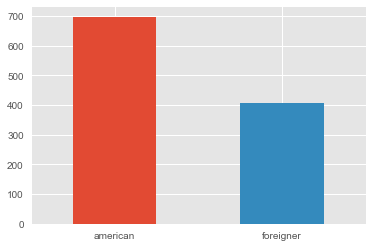

In [73]:
df10['citizenship'].value_counts().plot(kind='bar')
plt.xticks(rotation=-360)   # Rotate x-labels

In [74]:
df10['citizenship'].value_counts()

american     697
foreigner    405
Name: citizenship, dtype: int64

In [75]:
(df10[df10['citizenship']== 'foreigner']['citizenship'].count())/len(df10)

0.367513611615245

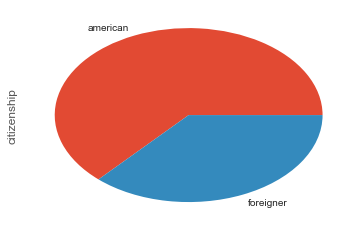

In [76]:
df10['citizenship'].value_counts().plot(kind='pie')

The data stand to disagree. This plot shows attacks by foreigners is about 35% of known attacks in the USA. Please, note that I said "known attacks." The whole dataset had cases for Americans, foreigners and those whose perpetrators are unknown. It is possible for the unknown instances to swing the pendulum either way. However, as I demonstrated in the inferential statistics part of the overall tasks, if we take the known cases as a sample of the whole population that comprises all instances, and ensuring we meet certain statistical conditions, we can generalize findings from the known to the unknowns

The second question I would probably look at is that: are there trends associated with this finding?

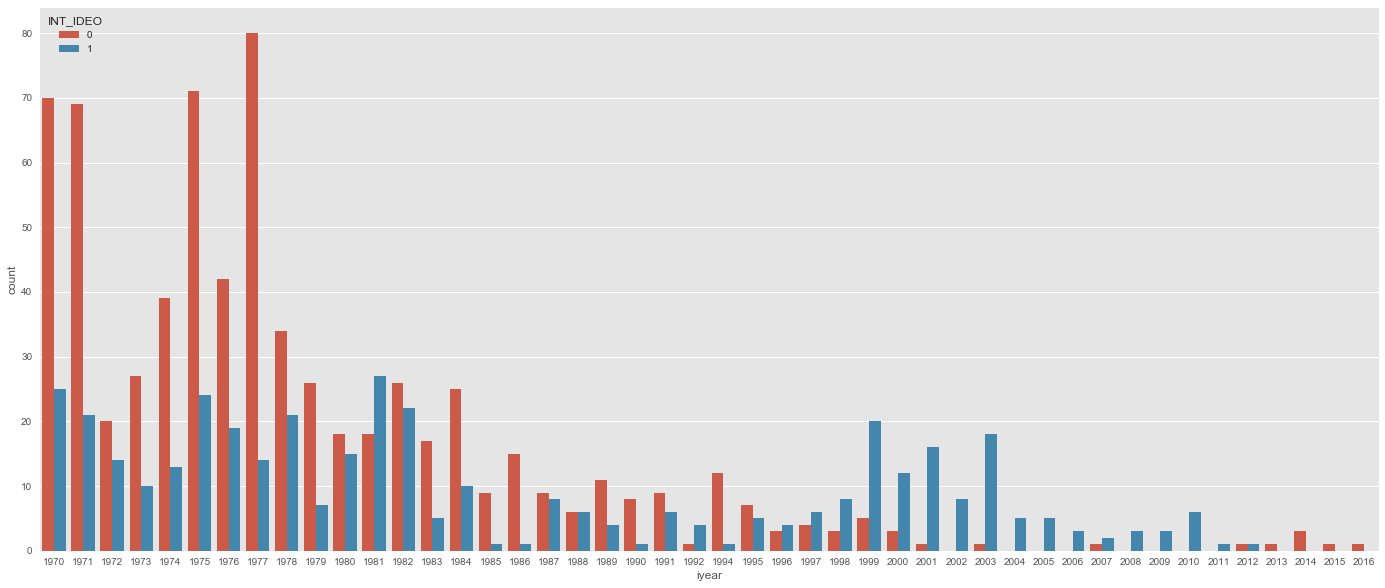

In [77]:
fig = plt.figure(figsize=(24, 10))
fig.add_subplot(1,1,1)
sns.countplot(x="iyear", hue="INT_IDEO", data=df10)
plt.show()

For cases that are known and well identified, we see Americans perpetrated more attacks against fellow citizens from 1970 up till about 1997. Around 1997, foreign attacks on home soil equaled and surpassed that of local attack. This alien attack on home soil peaked in 1999, went down a little around 2001 and then dropped significantly in 2004. After declining in 2004, it remained somewhat constant at that level till 2010 before falling dramatically again around 2011. After this drop, it has continued at this level to date. While attacks by fellow Americans remained at the same level as that of foreign nationals as of 2015, nothing is known yet about years after that. It suffices to say that going by recent occurrences after 2015; I guess that attacks by Americans on fellow citizens have surpassed that of foreigners on the home soil. This analysis will be updated with that information as soon as the University of Maryland updates the Global Terrorism Database.

In conclusion, this analysis shows a correlation between terrorist attacks and nationalities of individuals. Correlation does not necessarily mean causation without a designed experiment. However, residents in the USA - both citizens and non-citizens, should change their mindset in that a terrorist attack is as likely to be perpetrated by an American as a foreigner. Even more so an American on home soil.

** Checking null values present in the training and test set**

In [78]:
df9.shape

(1102, 42)

In [79]:
#showing that some of the variables in the training set have missing values
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 42 columns):
iyear           1102 non-null int64
imonth          1102 non-null int64
iday            1102 non-null int64
extended        1102 non-null int64
city            1102 non-null object
vicinity        1102 non-null int64
crit1           1102 non-null int64
crit2           1102 non-null int64
crit3           1102 non-null int64
doubtterr       1102 non-null int64
multiple        1102 non-null int64
success         1102 non-null int64
suicide         1102 non-null int64
attacktype1     1102 non-null int64
targtype1       1102 non-null int64
targsubtype1    1032 non-null float64
natlty1         1102 non-null float64
gname           1102 non-null object
guncertain1     1102 non-null float64
individual      1102 non-null int64
nperps          569 non-null float64
nperpcap        531 non-null float64
claimed         532 non-null float64
weaptype1       1102 non-null int64
weapsubtype1    99

In [80]:
##showing that some of the variables in the test set have missing values
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 367 to 1667
Data columns (total 42 columns):
iyear           552 non-null int64
imonth          552 non-null int64
iday            552 non-null int64
extended        552 non-null int64
city            552 non-null object
vicinity        552 non-null int64
crit1           552 non-null int64
crit2           552 non-null int64
crit3           552 non-null int64
doubtterr       552 non-null int64
multiple        552 non-null int64
success         552 non-null int64
suicide         552 non-null int64
attacktype1     552 non-null int64
targtype1       552 non-null int64
targsubtype1    528 non-null float64
natlty1         549 non-null float64
gname           552 non-null object
guncertain1     552 non-null float64
individual      552 non-null int64
nperps          355 non-null float64
nperpcap        336 non-null float64
claimed         339 non-null float64
weaptype1       552 non-null int64
weapsubtype1    500 non-null float64
n

***Creating a balanced training set***

In [81]:
df9.copy().shape

(1102, 42)

In [82]:
#this shows our training set is imbalanced, with more false than true
df9.copy()['INT_IDEO'].value_counts()

0    697
1    405
Name: INT_IDEO, dtype: int64

We need to balance this dataset so that our model doesn't overfit to the dominant class in the labels.

In [83]:
df_majority = df9.copy()[df9.copy()['INT_IDEO'] == 0]
df_minority = df9.copy()[df9.copy()['INT_IDEO'] == 1]

In [84]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=697,    # to match majority class
                                 random_state=123) # reproducible results

In [85]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [86]:
df_upsampled['INT_IDEO'].value_counts()

1    697
0    697
Name: INT_IDEO, dtype: int64

In [87]:
df_upsampled.shape

(1394, 42)

***Separating predictors from target variables***

In [88]:
#creating predictors and target variables for the train set
X_train = df_upsampled.drop(['INT_IDEO', 'gname', 'city', ], axis=1)
y_train = df_upsampled['INT_IDEO']

##creating predictors and target variables for the test set
test = test_set.copy()[(test_set.copy()['INT_LOG'] != -9) & (test_set.copy()['INT_MISC'] !=-9) &
                       (test_set.copy()['INT_ANY'] != -9) & (test_set.copy()['INT_IDEO'] != -9)]
test2= test.reset_index(drop=True)
X_test = test2.drop(['INT_IDEO', 'gname', 'city', ], axis=1)
y_test = test2['INT_IDEO']

In [89]:
X_train.shape, y_train.shape

((1394, 39), (1394,))

In [90]:
X_test.shape, y_test.shape

((282, 39), (282,))

In [91]:
X_test.head()

,iyear,imonth,iday,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_MISC,INT_ANY,state_region,new_gname
0,1977,10,11,0,0,1,1,1,0,0,0,0,3,2,21.0,217.0,0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,0.0,0.0,0,0,0,Midwest,3
1,1999,7,4,0,0,1,1,1,1,1,1,0,2,14,71.0,217.0,0.0,0,1.0,0.0,0.0,5,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,0,0,0,Midwest,3
2,1973,10,18,0,0,1,0,1,1,0,1,0,1,14,68.0,217.0,1.0,0,-99.0,-99.0,0.0,5,5.0,2.0,2.0,NaN,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,0,0,0,Northeast,3
3,1982,4,28,0,0,1,1,1,0,0,1,0,3,1,7.0,75.0,0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,0.0,0.0,0,1,1,Northeast,3
4,1970,8,18,0,0,1,1,1,0,0,0,0,7,12,61.0,217.0,0.0,0,-99.0,-99.0,0.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0,0,Northeast,3


In [92]:
X_test = X_test.drop(['property', 'weapsubtype1', 'targsubtype1',], axis=1)

In [93]:
X_test.isnull().sum()

iyear             0
imonth            0
iday              0
extended          0
vicinity          0
crit1             0
crit2             0
crit3             0
doubtterr         0
multiple          0
success           0
suicide           0
attacktype1       0
targtype1         0
natlty1           0
guncertain1       0
individual        0
nperps          134
nperpcap        146
claimed         144
weaptype1         0
nkill            11
nkillus         137
nkillter        141
nwound           13
nwoundus        140
nwoundte        144
propextent      138
propvalue       189
ishostkid        27
ransom           58
INT_LOG           0
INT_MISC          0
INT_ANY           0
state_region      0
new_gname         0
dtype: int64

In [94]:
X_train.head()

,iyear,imonth,iday,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_MISC,INT_ANY,state_region,new_gname
1,1979,2,27,0,0,1,1,1,0,0,1,0,3,1,4.0,217.0,0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,NaN,0.0,0.0,0,0,0,Northeast,3
2,1984,12,10,0,0,1,1,1,0,1,0,0,3,4,28.0,217.0,0.0,0,-99.0,-99.0,0.0,6,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,-99.0,0.0,NaN,0,0,0,Others,3
3,1970,4,23,0,0,1,1,1,0,1,0,0,3,3,22.0,163.0,0.0,0,-99.0,-99.0,1.0,6,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0,0,Others,3
6,1974,12,31,0,0,1,1,1,0,1,0,0,3,1,7.0,163.0,0.0,0,-99.0,-99.0,-9.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0,0,0,Others,3
9,1971,6,5,0,0,1,1,1,0,0,1,0,2,1,11.0,217.0,0.0,0,4.0,NaN,NaN,5,3.0,1.0,1.0,NaN,0.0,NaN,NaN,1,3.0,1000.0,0.0,0.0,0,0,0,Northeast,3


In [95]:
X_train = X_train.drop(['property', 'weapsubtype1', 'targsubtype1',], axis=1)

In [96]:
X_test.isnull().sum()

iyear             0
imonth            0
iday              0
extended          0
vicinity          0
crit1             0
crit2             0
crit3             0
doubtterr         0
multiple          0
success           0
suicide           0
attacktype1       0
targtype1         0
natlty1           0
guncertain1       0
individual        0
nperps          134
nperpcap        146
claimed         144
weaptype1         0
nkill            11
nkillus         137
nkillter        141
nwound           13
nwoundus        140
nwoundte        144
propextent      138
propvalue       189
ishostkid        27
ransom           58
INT_LOG           0
INT_MISC          0
INT_ANY           0
state_region      0
new_gname         0
dtype: int64

#### Final data cleaning that Imputes missing values, hotcode categorical values and standardize the scale of continous variables

From cell 71, we see that 'state_region' is identified as text based categorical variables. These need converted to numerical variable because Random Forest (RF) cannot handle string or text. One way to do that is to use Label Encoding module in scikit learn library. However, with that one may run into another issue that can best be explained here: https://stackoverflow.com/questions/44959122/how-to-handle-categorical-features-for-decision-tree-random-forest-in-spark-ml and https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/
RF should be able to handle categorical features when encoding as numerical arrays. In fact RF implementation in R does to about 32 cardinality depth, with options for more. However, as of this analysis, RF implemenation in scikit learn will give a misleading interpretaion of the encoded numerical arrays. For such features, It is advisable to use One-Hot Encoding module in scikit learn after label encoding when categories > 2 to provide optimum result.Instead of going this route, Pandas also has a function for such that can handle both computations, making it a little shorter. It also allows me see the generated dummy features in nice format.

An issue with encoding data this way is greatly increasing the dimensionality of the dataset. This dataset now has 38 features with the possibility of increasing to 43 after hot coding  compared with 1394 observations in the test set. This may lead to what is called curse of dimensionality - a phenomenon that causes some learning algorithms to perform poorly. I like the explanation that William Chen gave https://www.quora.com/What-is-the-curse-of-dimensionality. Such can be reduced using Principal Component Analysis ( PCA ), which is an unsupervised learning method. Since i am not doing unsupervised clustering, a way i propose to get around this is using RF to select important variables. This will prune the dimension down to one that can provide good accuracy.

If we also look at the histogram plots we had earlier, we see that all the variables are not on same scale. It's always a good to have this because powers that be said it helps models perform better, especially linear models. Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. This is performed on continuous variables. There are two ways to do this: min-max scaling and standardization. I will be doing both here since some algorithms perform better with one than the other. Courtesy: Aurelien Geron book - Hands-On Machine Learning with Scikit-Learn & TensorFlow

In [97]:
cat_attribs = ['state_region', 'new_gname', 'weaptype1', 'propextent', 'targtype1', 
               'natlty1', 'attacktype1',]
num_attribs = list(X_train.drop(cat_attribs, axis=1))
#num_attribs = X_train.columns

In [98]:
X_train['weaptype1'].unique()

array([ 6,  5, 11,  8,  7, 13,  2,  9, 12,  1, 10], dtype=int64)

In [99]:
X_train['propextent'].unique()

array([ 4.,  3., nan,  2.,  1.])

In [114]:
len(X_train['propextent'])

1394

In [119]:
X_train['propextent'].fillna(X_train['propextent'].mode())

1       4.0
2       3.0
3       NaN
6       NaN
9       3.0
10      NaN
12      4.0
13      3.0
16      NaN
18      3.0
19      3.0
21      NaN
22      NaN
24      3.0
25      NaN
28      3.0
29      NaN
32      NaN
33      3.0
34      4.0
36      4.0
37      NaN
38      NaN
42      3.0
43      3.0
45      3.0
47      3.0
48      3.0
49      NaN
50      3.0
       ... 
107     NaN
488     NaN
842     NaN
902     3.0
1020    NaN
960     3.0
340     3.0
581     2.0
519     3.0
103     3.0
658     NaN
332     3.0
658     NaN
700     NaN
1029    NaN
648     NaN
44      3.0
311     NaN
405     NaN
358     NaN
323     NaN
257     NaN
329     NaN
1008    3.0
640     3.0
705     3.0
448     4.0
878     NaN
454     NaN
173     NaN
Name: propextent, Length: 1394, dtype: float64

In [116]:
X_train['propextent'].value_counts()

3.0    512
4.0    146
2.0     46
1.0      7
Name: propextent, dtype: int64

In [117]:
X_train.head()

,iyear,imonth,iday,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_MISC,INT_ANY,state_region,new_gname
1,1979,2,27,0,0,1,1,1,0,0,1,0,3,1,217.0,0.0,0,NaN,NaN,NaN,6,0.0,NaN,NaN,0.0,NaN,NaN,4.0,NaN,0.0,0.0,0,0,0,Northeast,3
2,1984,12,10,0,0,1,1,1,0,1,0,0,3,4,217.0,0.0,0,-99.0,-99.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-99.0,0.0,NaN,0,0,0,Others,3
3,1970,4,23,0,0,1,1,1,0,1,0,0,3,3,163.0,0.0,0,-99.0,-99.0,1.0,6,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0,0,0,Others,3
6,1974,12,31,0,0,1,1,1,0,1,0,0,3,1,163.0,0.0,0,-99.0,-99.0,-9.0,6,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,Others,3
9,1971,6,5,0,0,1,1,1,0,0,1,0,2,1,217.0,0.0,0,4.0,NaN,NaN,5,1.0,1.0,NaN,0.0,NaN,NaN,3.0,1000.0,0.0,0.0,0,0,0,Northeast,3


In [ ]:
X_train['targtype1'].unique()

In [ ]:
X_train['natlty1'].unique()

In [ ]:
X_train['attacktype1'].unique()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
#this class was used to impute missing values
class DataFrameSelector(TransformerMixin):
    def __init__(self, attribute_names):        
        self.attribute_names = attribute_names
    def fit(self, X, y=None):      
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [ ]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# This class is no available yet, but will be in Scikit-Learn 2.0.
#Thanks to Aurelien Geron for the info in his Hands-On Machine Learning with Scikit_Learn & TensorFlow book and blog

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.

    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """
    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """
        #Fit the CategoricalEncoder to X.
        #Parameters
        #----------
        #X : array-like, shape [n_samples, n_feature]
        #    The data to determine the categories of each feature.
        #Returns
        #-------
        #self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """
        #Transform X using one-hot encoding.
        #Parameters
        #----------
        #X : array-like, shape [n_samples, n_features]
            #The data to encode.
        #Returns
        #-------
        #X_out : sparse matrix or a 2-d array
            #Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
# importing necessary transformation modules 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import CategoricalEncoder # coming in Scikit-Learn 2.0
from sklearn.preprocessing import Imputer

#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)), 
                         ('imputer', Imputer(strategy="median")), ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),
                                                 ("cat_pipeline", cat_pipeline),])

In [ ]:
#fitting the full pipeline to the training set
train_set_tr = full_pipeline.fit_transform(X_train)
train_set_tr

In [ ]:
train_set_tr.shape

In [ ]:
#fitting the full pipeline to the test set
test_set_tr = full_pipeline.fit_transform(X_test)
test_set_tr

In [ ]:
test_set_tr.shape

### Building and selecting the machine learning model

In [ ]:
#importing 4 different classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
#instantiating the classifiers 
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [ ]:
#aggregating the predictions of each classifier and predict the class that gets the most votes
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators, voting='hard')
voting_clf.fit(train_set_tr, y_train)

In [ ]:
all_estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('vc', voting_clf)]

In [ ]:
#let's check each classifier's accuracy on the test set.
#for some reason i was getting the error msg - AttributeError: 'LogisticRegression' object has no attribute '_class_', 
#so i switched imports to 'import sklearn.linear_model as lm' and that worked. 

from sklearn.metrics import accuracy_score
for name, clf in all_estimators:
    clf.fit(train_set_tr, y_train)
    y_pred = clf.predict(test_set_tr)
    print(name, accuracy_score(y_test, y_pred))

The above results show that all our classiers did somewhat well. However, Random Forest algorithm was a winner :)!  Remember we saw some issues during the exploratory data analysis. So, sticking with it for the remainder of this analysis because industry argument says ensemble algorithms like Random Forest:

1. handle well with outliers
2. are somewhat reburst against multicollinearity
3. rarely overfits

Having gotten above results by fitting all predictors, i will now check if selecting the most important predictors improves the result for Random Forest.

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

In [ ]:
# Train the classifier
rf.fit(train_set_tr, y_train)

In [ ]:
#Print the name and gini importance of each feature
features_list = []
feature_imprt_list=[]
for feature, feature_imprt in zip(X_train.columns, rf.feature_importances_):
    features_list.append(feature)
    feature_imprt_list.append(feature_imprt)
    #print(feature)

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.025, prefit=True) #prefit=True does exactly same as sfm.fit(train_set_tr, y_train)

In [ ]:
#Print the name and gini importance of each feature
imprt_features = []
for feature_list_index in sfm.get_support(indices=True):
    if feature_list_index < len(X_train.columns):
        imprt_features.append(X_train.columns[feature_list_index])
print(imprt_features)

In [ ]:
feature_df = pd.DataFrame({'feature_name': features_list,'feature_imprt': feature_imprt_list})
feature_df

In [ ]:
#plotting all features
fig = plt.figure(figsize=(40, 20))
fig.add_subplot(1,1,1)
sns.barplot(x='feature_name', y='feature_imprt', data= feature_df)
plt.show()

In [ ]:
#plotting most important features
imprt_feature = feature_df[feature_df['feature_name'].isin(imprt_features)]
imprt_feat_desc= imprt_feature.sort_values(by='feature_imprt', ascending=False)

In [ ]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,1,1)
sns.barplot(x='feature_name', y='feature_imprt', data= imprt_feat_desc)
plt.show()

***Creating a model with the most important features***

In [ ]:
train_bal_imprt = df_upsampled.copy()[imprt_features]
train_bal_imprt.head()

In [ ]:
train_bal_imprt.shape

In [ ]:
train_bal_imprt.dtypes

In [ ]:
#creating predictors and target variables for the train set
X_train2 = train_bal_imprt
y_train2 = df_upsampled['INT_IDEO']

In [ ]:
num_attribs2 = X_train2.columns

In [ ]:
#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs2)), ('imputer', Imputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
#cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs2)), 
                         #('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),])
                                                 #("cat_pipeline", cat_pipeline),])

In [ ]:
#fitting the full pipeline to the training set
train_set_tr2 = full_pipeline.fit_transform(X_train2.astype(str))
train_set_tr2

In [ ]:
train_set_tr2.shape, y_train.shape, test_set_tr.shape, y_test.shape

In [ ]:
#building the model from the important features
imprt_rf = RandomForestClassifier()
imprt_rf.fit(train_set_tr2, y_train)

#predicting the model from the important features
y_pred = rnd_clf.predict(test_set_tr)

#printing the accuracy scores
print(accuracy_score(y_test, y_pred))


We see above that there is no difference in accuracy using the important features. The only reason one may one to go with the important features is to reduce the dimention of the overall model, in the sense that if one can get the same result with less, then it is better to go with that.

### Cross-validating our Model


In [ ]:
import sklearn.model_selection as ms

ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.StratifiedKFold(shuffle = True))

In [ ]:
ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.StratifiedKFold(shuffle = False))

In [ ]:
ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.KFold(shuffle = True))

In [ ]:
ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.KFold(shuffle = False))

The above shows the model is not overfitting, which is very good.

### Checking the model performance

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(confusion_mat)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat, figsize= [10, 10], cmap='PuOr')
plt.show()

In [ ]:
#we can also see this model is predicting the two classes as shown below
print(np.unique(y_test))

This tells us none of the classes is dominating the prediction, which is good

From the confusion matrix above, we see some of the predictions were incorrect. In cases where one has imbalanced classes or dataset, accuracy alone cannot be enough to measure how well a model will do on out of sample dataset. Performance metrics like the Confusion Matrix above allows one see the likelihood of the model distinguishing observations from different classes. In other words, if we randomly select one observation from each class, what's the probability that the model will be able to "rank" them correctly?

- For cases of all nationality of terrorism perpetrator group same as the nationality of the target(s)/victim(s), represented as   0 with index 0, we see that the model got the prediction of 190 observations correctly, and 5 wrong.
- For cases of nationality of terrorism perpetrator group differing from the nationality of the target(s)/victim(s), represented   as 1 with index 1, we see that the model got the prediction of 80 observations correctly, and 7 wrong.

### Things that needs improved in the model and dataset


- I removed 'gname' from the dataset because after feature analysis, and when i did train-test-split, some of the classes in test data set, were missing in the train dataset because these variables contains lot of uneven classes. A way i propose resolving this is using some form of fuzzy matching algorithm to group words of same type with the help of some domain knowledge. This would help improve the unevenness of the classes.

- I also propose engineering a feature by combining the iyear, imonth, iday features into one using a datetime format to see if that improves the model

- In the exploratory data analysis, we saw some issues with outliers and multicollinerarity affecting some variables, one of which is 'INT_ANY' feature. The predictive model using Random Forest said that feature was important, but such features may not considered when carrying out inferential statistics because of data leakage. So, important questions need asked if such features should be left in or remove to see how conclusions from prediction and inferential analysis turns out. 

- Consideration would also given to hyperparameter tuning.